In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

NYPD_Database = pd.read_csv('https://raw.githubusercontent.com/mayrosenfeld/DataAnalyticsClass/refs/heads/main/NYPD_Hate_Crimes_20251208.csv')
NYPD_Database.head()

,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Arrest Date,Arrest Id
0,201906012119317,2019,1,01/23/2019,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
1,201906012175717,2019,2,02/25/2019,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
2,201906012180117,2019,2,02/27/2019,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
3,201906012273417,2019,4,04/16/2019,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
4,201906012413717,2019,6,06/20/2019,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN


First Look at the Data
We now inspect the basic structure of the dataset:

Number of rows and columns (df.shape)
Column names (df.columns)
Data types and non-null counts (df.info())
Summary statistics for numeric columns (df.describe()).

In [ ]:
print('Shape (rows, columns):', NYPD_Database.shape)

print('\nColumn names:')
print(NYPD_Database.columns)

print('\nData types and non-null counts:')
NYPD_Database.info()

print('\nSummary statistics (numeric columns):')
NYPD_Database.describe()

Shape (rows, columns): (3872, 14)

Column names:
Index(['FULL_COMPLAINT_ID', 'COMPLAINT_YEAR_NUMBER', 'MONTH_NUMBER',
       'RECORD_CREATE_DATE', 'COMPLAINT_PRECINCT_CODE', 'PATROL_BOROUGH_NAME',
       'COUNTY', 'LAW_CODE_CATEGORY_DESCRIPTION', 'OFFENSE_DESCRIPTION',
       'PD_CODE_DESCRIPTION', 'BIAS_MOTIVE_DESCRIPTION', 'OFFENSE_CATEGORY',
       'ARREST_DATE', 'ARREST_ID'],
      dtype='object')

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FULL_COMPLAINT_ID              3872 non-null   int64  
 1   COMPLAINT_YEAR_NUMBER          3872 non-null   int64  
 2   MONTH_NUMBER                   3872 non-null   int64  
 3   RECORD_CREATE_DATE             3872 non-null   object 
 4   COMPLAINT_PRECINCT_CODE        3872 non-null   int64  
 5   PATROL_BOROUGH_NAME           

,FULL_COMPLAINT_ID,COMPLAINT_YEAR_NUMBER,MONTH_NUMBER,COMPLAINT_PRECINCT_CODE,ARREST_DATE
count,3.872000e+03,3872.000000,3872.000000,3872.000000,0.0
mean,2.022304e+14,2022.244835,6.304236,59.120351,NaN
std,1.823992e+11,1.823658,3.285738,38.003684,NaN
min,2.019001e+14,2019.000000,1.000000,1.000000,NaN
25%,2.021032e+14,2021.000000,3.750000,19.000000,NaN
50%,2.022112e+14,2022.000000,6.000000,66.000000,NaN
75%,2.024019e+14,2024.000000,9.000000,90.000000,NaN
max,2.025122e+14,2025.000000,12.000000,123.000000,NaN


Data Cleaning

Clean column names (lowercase, replace spaces with underscores)


In [ ]:
NYPD_Database.columns = (
    NYPD_Database.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.replace('-', '_')
)
NYPD_Database.columns

Index(['full_complaint_id', 'complaint_year_number', 'month_number',
       'record_create_date', 'complaint_precinct_code', 'patrol_borough_name',
       'county', 'law_code_category_description', 'offense_description',
       'pd_code_description', 'bias_motive_description', 'offense_category',
       'arrest_date', 'arrest_id'],
      dtype='object')

In [ ]:
#inspect uniqe Value
NYPD_Database['bias_motive_description'].unique()

array(['ANTI-JEWISH', 'ANTI-WHITE', 'ANTI-TRANSGENDER',
       'ANTI-MALE HOMOSEXUAL (GAY)', 'ANTI-BLACK', 'ANTI-ASIAN',
       'ANTI-FEMALE HOMOSEXUAL (LESBIAN)', 'ANTI-MUSLIM', 'ANTI-HISPANIC',
       'ANTI-GENDER NON-CONFORMING', 'ANTI-OTHER ETHNICITY', 'ANTI-ARAB',
       'ANTI-PHYSICAL DISABILITY', 'ANTI-LGBT (MIXED GROUP)',
       'ANTI-OTHER RELIGION', 'ANTI-CATHOLIC',
       'ANTI-RELIGIOUS PRACTICE GENERALLY', 'ANTI-PROTESTANT',
       '60 YRS AND OLDER', 'ANTI-BUDDHIST', 'ANTI-FEMALE', 'ANTI-SIKH',
       'ANTI-JEHOVAHS WITNESS', 'ANTI-EASTERN ORTHODOX',
       'ANTI-OTHER CHRISTIAN', 'ANTI-MULTI-RACIAL GROUPS', 'ANTI-HINDU',
       'ANTI-MORMON', 'ANTI-MALE'], dtype=object)

In [ ]:
NYPD_Database['county'].unique()

array(['KINGS', 'NEW YORK', 'QUEENS', 'BRONX', 'RICHMOND'], dtype=object)

In [ ]:
# FILTER ENTITIES
QUEENS = NYPD_Database[NYPD_Database['county'] == 'QUEENS']
KINGS = NYPD_Database[NYPD_Database['county'] == 'KINGS']
NEW_YORK = NYPD_Database[NYPD_Database['county'] == 'NEW YORK']
BRONX = NYPD_Database[NYPD_Database['county'] == 'BRONX']
RICHMOND = NYPD_Database[NYPD_Database['county'] == 'RICHMOND']
print(QUEENS)

      full_complaint_id  complaint_year_number  month_number  \
450     201910412211717                   2019             1   
451     201910412247817                   2019             3   
452     201910412607917                   2019             8   
453     201911212293317                   2019             6   
454     201911212454917                   2019            11   
...                 ...                    ...           ...   
3516    202411413123617                   2024             9   
3517    202510712590617                   2025             8   
3518    202511012355917                   2025             3   
3519    202511112180617                   2025             3   
3520    202511212267517                   2025             4   

     record_create_date  complaint_precinct_code       patrol_borough_name  \
450          03/05/2019                      104  PATROL BORO QUEENS NORTH   
451          03/22/2019                      104  PATROL BORO QUEENS NORTH 

In [ ]:
print("=== TOTAL ARRESTS ===")
print("Queens:", len(QUEENS))
print("New York:", len(NEW_YORK))
print("Kings:", len(KINGS))
print("Bronx:", len(BRONX))
print("Richmond:", len(RICHMOND))

=== TOTAL ARRESTS ===
Queens: 717
New York: 1433
Kings: 1360
Bronx: 222
Richmond: 140


In [ ]:
print("\n=== Top 5 Bias Motivations in Manhattan ===")
print(NEW_YORK['bias_motive_description'].value_counts().head())

print("\n=== Top 5 Bias Motivations in Queens ===")
print(QUEENS['bias_motive_description'].value_counts().head())

print("\n=== Top 5 Bias Motivations in Bronx ===")
print(BRONX['bias_motive_description'].value_counts().head())


=== Top 5 Bias Motivations in Manhattan ===
bias_motive_description
ANTI-JEWISH                   622
ANTI-MALE HOMOSEXUAL (GAY)    233
ANTI-ASIAN                    225
ANTI-BLACK                     76
ANTI-WHITE                     58
Name: count, dtype: int64

=== Top 5 Bias Motivations in Queens ===
bias_motive_description
ANTI-JEWISH                   272
ANTI-MALE HOMOSEXUAL (GAY)     90
ANTI-ASIAN                     74
ANTI-BLACK                     73
ANTI-MUSLIM                    43
Name: count, dtype: int64

=== Top 5 Bias Motivations in Bronx ===
bias_motive_description
ANTI-JEWISH                   91
ANTI-MALE HOMOSEXUAL (GAY)    33
ANTI-BLACK                    27
ANTI-TRANSGENDER              13
ANTI-MUSLIM                   13
Name: count, dtype: int64


In [39]:
# Filter for Anti-Asian
anti_asian = NYPD_Database[NYPD_Database['bias_motive_description'] == 'ANTI-ASIAN']

# Filter for the three boroughs picked
boroughs = anti_asian[anti_asian['county'].isin(['NEW YORK', 'QUEENS', 'BRONX'])]

grouped = boroughs.groupby(['county', 'complaint_year_number']).size().reset_index(name='count')
print(grouped)

      county  complaint_year_number  count
0      BRONX                   2020      5
1      BRONX                   2021      3
2      BRONX                   2022      1
3      BRONX                   2025      1
4   NEW YORK                   2020     17
5   NEW YORK                   2021     84
6   NEW YORK                   2022     62
7   NEW YORK                   2023     28
8   NEW YORK                   2024     27
9   NEW YORK                   2025      7
10    QUEENS                   2020      3
11    QUEENS                   2021     31
12    QUEENS                   2022      9
13    QUEENS                   2023     19
14    QUEENS                   2024      9
15    QUEENS                   2025      3


In [40]:
pivot = grouped.pivot(index='complaint_year_number', columns='county', values='count').fillna(0).astype(int)

print(pivot)

county                 BRONX  NEW YORK  QUEENS
complaint_year_number                         
2020                       5        17       3
2021                       3        84      31
2022                       1        62       9
2023                       0        28      19
2024                       0        27       9
2025                       1         7       3


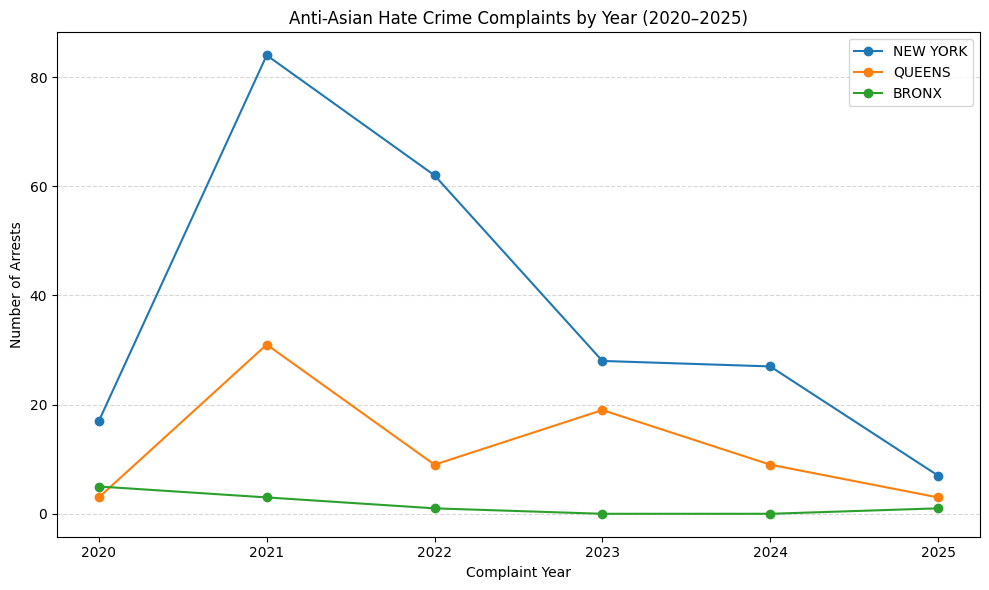

In [45]:
plt.figure(figsize=(10,6))
for county in ['NEW YORK', 'QUEENS', 'BRONX']:
    if county in pivot.columns:
        plt.plot(pivot.index, pivot[county], marker='o', label=county)

plt.title("Anti-Asian Hate Crime Complaints by Year (2020–2025)")
plt.xlabel("Complaint Year")
plt.ylabel("Number of Arrests")
plt.xticks(range(2020, 2026))  # ensures x-axis shows 2020–2025
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [49]:
NYPD_Database['arrest_date'].unique()

array([nan])

In [59]:
top5_manhattan = NEW_YORK['bias_motive_description'].value_counts().head(5)
top5_queens = QUEENS['bias_motive_description'].value_counts().head(5)
top5_bronx = BRONX['bias_motive_description'].value_counts().head(5)

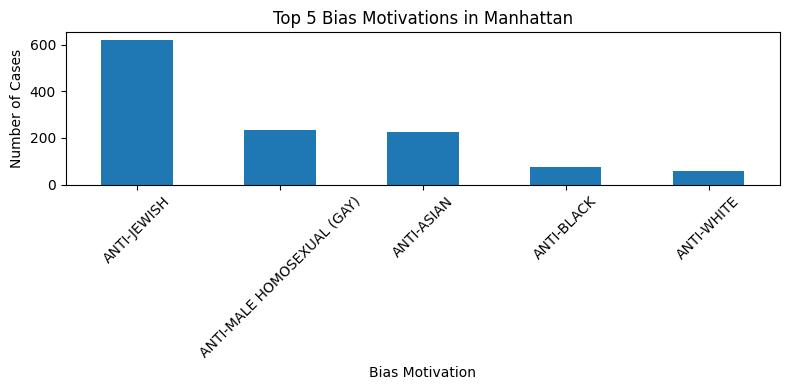

In [60]:
plt.figure(figsize=(8,4))
top5_manhattan.plot(kind='bar')
plt.title("Top 5 Bias Motivations in Manhattan")
plt.xlabel("Bias Motivation")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

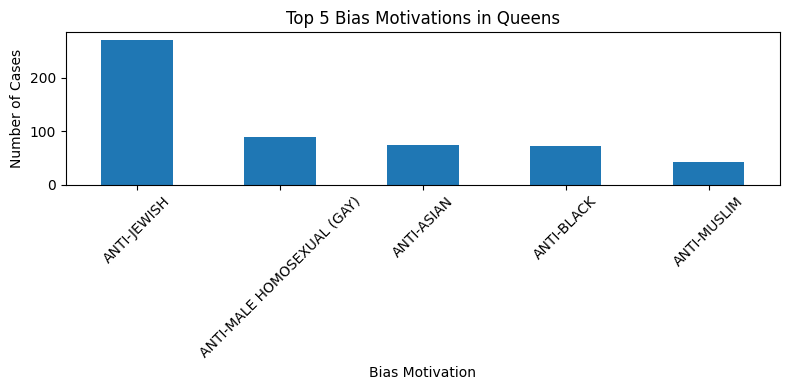

In [61]:
plt.figure(figsize=(8,4))
top5_queens.plot(kind='bar')
plt.title("Top 5 Bias Motivations in Queens")
plt.xlabel("Bias Motivation")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

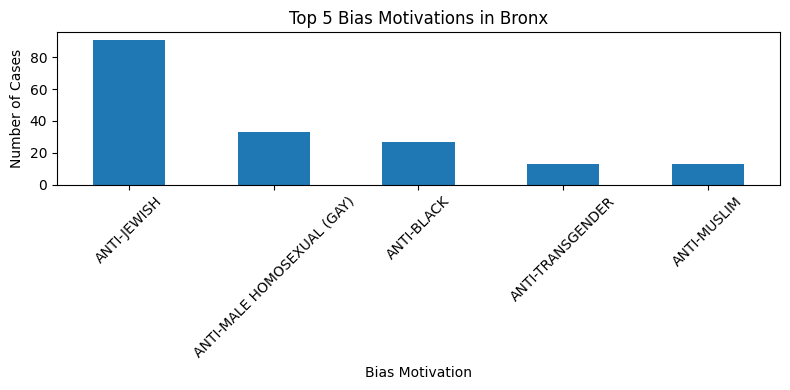

In [62]:
plt.figure(figsize=(8,4))
top5_bronx.plot(kind='bar')
plt.title("Top 5 Bias Motivations in Bronx")
plt.xlabel("Bias Motivation")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

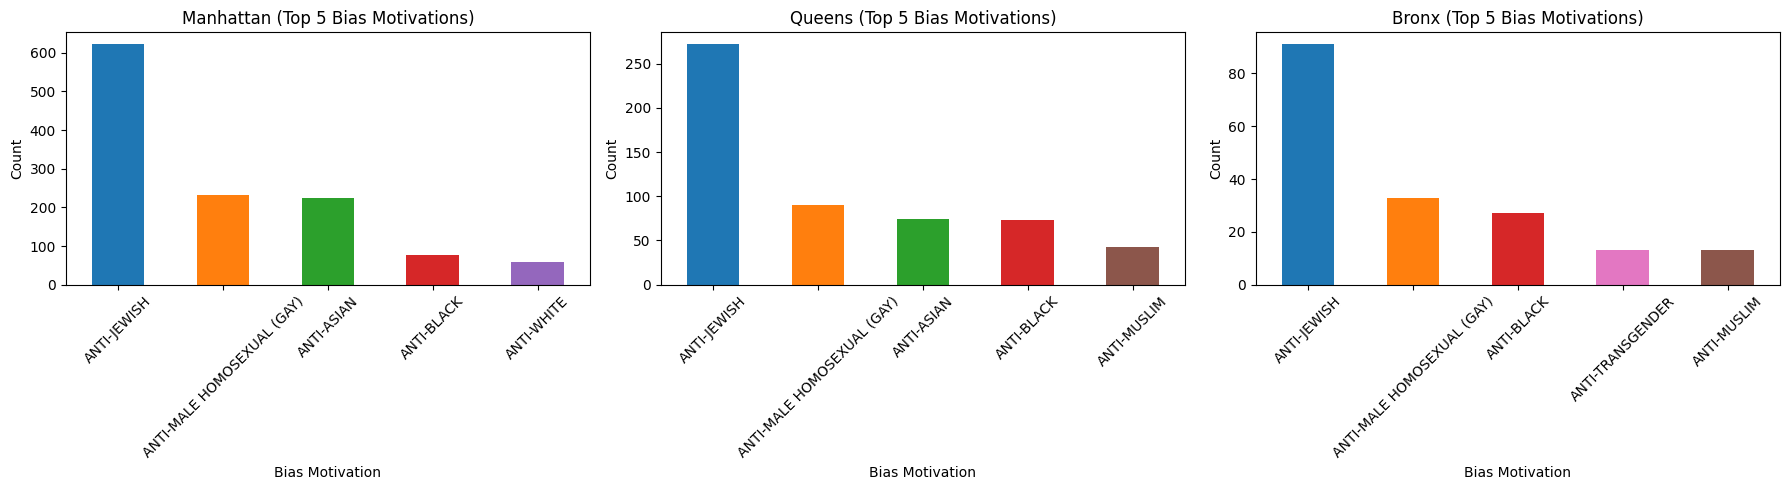

In [70]:
from matplotlib import colors
plt.figure(figsize=(18, 5))

def get_colors(series):
    return [color_map.get(x, "#7f7f7f") for x in series.index]

color_map = {
    "ANTI-JEWISH": "#1f77b4",
    "ANTI-MALE HOMOSEXUAL (GAY)": "#ff7f0e",
    "ANTI-ASIAN": "#2ca02c",
    "ANTI-BLACK": "#d62728",
    "ANTI-WHITE": "#9467bd",
    "ANTI-MUSLIM": "#8c564b",
    "ANTI-TRANSGENDER": "#e377c2"
}

# Manhattan
plt.subplot(1, 3, 1)
top5_manhattan.plot(kind='bar', color=get_colors(top5_manhattan))
plt.title("Manhattan (Top 5 Bias Motivations)")
plt.xlabel("Bias Motivation")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Queens
plt.subplot(1, 3, 2)
top5_queens.plot(kind='bar', color=get_colors(top5_queens))
plt.title("Queens (Top 5 Bias Motivations)")
plt.xlabel("Bias Motivation")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Bronx
plt.subplot(1, 3, 3)
top5_bronx.plot(kind='bar', color=get_colors(top5_bronx))
plt.title("Bronx (Top 5 Bias Motivations)")
plt.xlabel("Bias Motivation")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Conclusion**
Anti-Jewish cases were the most common in all three boroughs, and Manhattan had the highest numbers overall. Queens and the Bronx had fewer cases but showed similar patterns. Anti-Asian cases were also high, especially in Manhattan, which may reflect the population in that area or how often people report these crimes. These results show that bias in the data can come from real differences in crime, but also from differences in reporting and police response.